## Short Answer  
Please answer each of the following questions with **at least 2-3 complete sentences**. 

1. Why do we use a validation dataset during training, and what can the performance between the validation dataset and the training set tell us?

To determine how well the network does with data outside the training set

2. What is the major difference between a fully-connected layer and a convolutional layer in terms of the scale of patterns they look for in their input?

A convolutional layer's neurons are connected to a few local neurons whereas a fully connected layer is connected to all the neurons

3. If you performed 128 convolutions with filter size 3x3 and a stride of 1 on an input that is 100x100x64 and padded the inputs, what would the output shape be of this layer? 

(100-3+2x1)/1+1=100

4. Matrix A has a shape of 250x200 and matrix B has a shape of 250x100. Can you perform a matrix multiplication between A and B in that order without performing any other operations first (True or False)?

False

5. Matrix A has a shape of 3x5 and matrix B has a shape of 3x5. Can these two matrices be added together elementwise (True or False)?

True

In [0]:
try:
  import tflearn
except ImportError:
  !pip3 install -q tflearn
  import tflearn

In [0]:
import numpy as np
import os
from google.colab import drive
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d
from tflearn.activations import relu
from tflearn.layers.normalization import batch_normalization as bn
from tflearn.layers.estimator import regression
from tflearn.data_utils import to_categorical
import matplotlib.pyplot as plt

In the line below, create a matrix full of zeros with 90 rows and 50 columns. Then print the row with index 5 in this matrix.

In [8]:
filter1 = np.zeros([90, 50]) # create the array
print(filter1[5, ...])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [12]:
# load in the flowers dataset
import tflearn.datasets.oxflower17 as oxflower17
X, Y = oxflower17.load_data(one_hot=True, resize_pics=(100, 100))

100.0% 60276736 / 60270631


('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted
Starting to parse images...
Parsing Done!


In the line below, print the shapes of the data and labels. These shapes will help you later when defining the network.

In [25]:
print(X.shape)
print(Y.shape)

(1360, 100, 100, 3)
(1360, 17)


Below, show the image with index 500 in the dataset X.

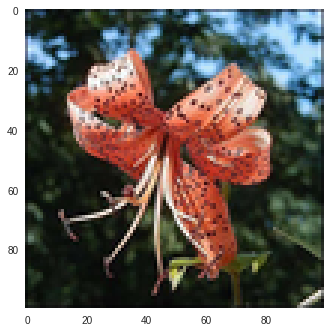

In [14]:
plt.imshow(X[500, ...])
plt.grid(False)

In the line below, plot a histogram of X using an appropriate number of bins.

([array([ 1.,  3.,  1.,  2.,  0.,  0.,  1.,  0.,  0.,  1.,  4.,  0.,  5.,
          1.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
          2.,  3., 11.,  8.,  6.,  5.,  2.,  3.,  0.,  2.,  1.,  0.,  2.,
          0.,  1.,  3.,  2.,  2.,  2.,  5.,  3.,  4., 10.]),
  array([4., 1., 2., 1., 0., 0., 0., 0., 2., 2., 4., 9., 9., 1., 4., 2., 4.,
         2., 1., 1., 1., 5., 6., 3., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1.,
         0., 1., 1., 1., 5., 2., 7., 2., 4., 1., 0., 0., 0., 0., 0.]),
  array([11., 13.,  8., 11., 17., 23.,  8.,  5.,  2.,  1.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])],
 array([0.        , 0.02032813, 0.04065626, 0.06098439, 0.08131253,
        0.10164066, 0.12196879, 0.14229692, 0.16262505, 0.18295318,
        0.20328131, 0.22360944, 0.24393758, 0.26426571, 0.28459384,
    

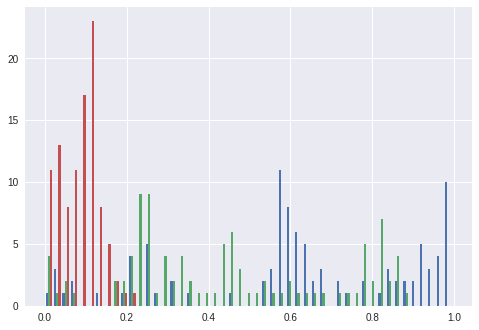

In [19]:
plt.hist(X[90, 50], bins=49)

In the line below, normalize the images by subtracting the mean and dividing by the standard deviation of every pixel. 

In [0]:
X_mean = np.mean(X, 0) # get mean pixel value at every location in image
X -= X_mean # subtract mean of each pixel location from every pixel in that location

You will now create a convolutional neural network to predict the flower species from the images. In the line below, create an input layer for the network based on the shape of the images. 

In [0]:
in_layer = tflearn.input_data(shape=[None, 100, 100, 3])

In the line below, finish the line and create a convolutional layer to take in the input layer and slide 64 filters with shape 7x7 around it using the relu activation function. You might find the documentation for the conv_2d function helpful: http://tflearn.org/layers/conv/

In [31]:
conv1 = conv_2d(in_layer, 64, 7, activation='relu', name='c1')

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


In the line below, I have created a second convolutional layer which will take in the first convolutional layer's feature maps as input. Write a comment to indicate 1) how many filters this layer has, 2) what the filter size is, and 3) what the height and width of each output feature map should be based on the stride.

In [0]:
# 128 filters
# 3x3 filter size
# 25.25x25.25 should be output size
conv2 = conv_2d(conv1, 128, 3, activation='relu', strides=4)

In the line below, replace the question marks with appropriate values, keeping in mind this will be the output layer of the network.

In [0]:
output_layer = fully_connected(conv2, 98, activation='softmax')

In the line below, remove the question mark and replace it with an appropriate value for the learning rate.

In [35]:
opt = regression(output_layer, optimizer='adam', learning_rate=0.01, loss='categorical_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


You don't need to do anything for the line below. 

In [0]:
model = tflearn.DNN(opt)

In the line below, replace each question mark with appropriate values and write a comment next to each line describing what it does (you only need to comment the lines I write *comment here* after.).

In [37]:
model.fit(X, # input images to train
          Y, # input labels
          validation_set=0.1, # use a random 10% of samples as validation
          show_metric=True, 
          n_epoch=10,  # number of times to go through entire dataset in increments of 75
          batch_size=75,  # number of images to send to network each training iteration
          snapshot_step=200)

IndexError: ignored

Download this notebook and upload it to your branch on the class github. 